# Nepali Music Data Analysis and Visualization

This notebook combines various data analysis and visualization techniques applied to Nepali music data obtained from Spotify.
Each section includes descriptive titles, labeled plots, and is ready for presentation or inclusion in a thesis.

## Correlation Heatmap of Audio Features

This heatmap reveals relationships between numerical features such as BPM, Energy, Valence, and Popularity.

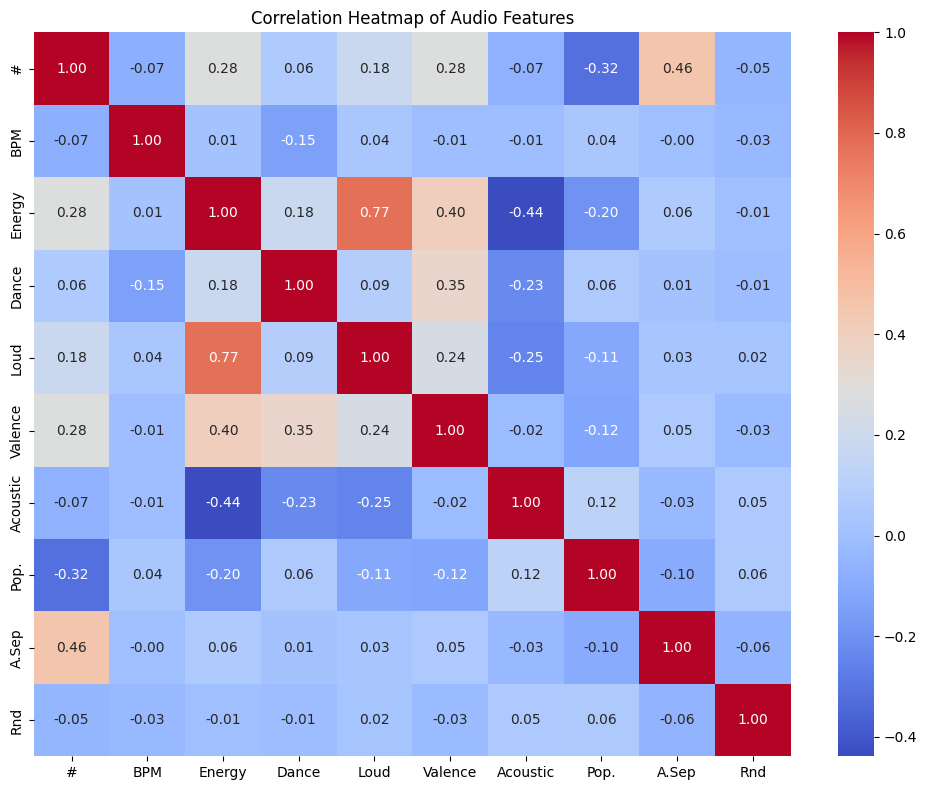

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/musicdata_cleaned.csv")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Audio Features")
plt.tight_layout()
plt.show()

## Distribution of Energy Across Simulated Genres

Boxplot visualizing how 'Energy' varies across genre labels inferred from audio characteristics.

C:\Users\User\AppData\Local\Temp\ipykernel_14360\3198749616.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Simulated Genre', y='Energy', palette='Set3')


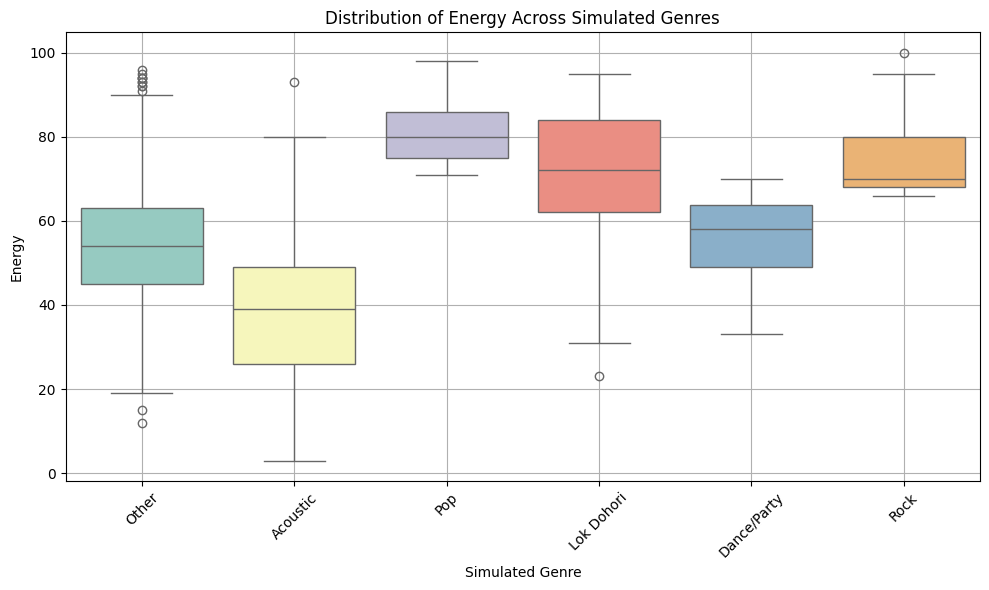

In [4]:
df['Length'] = df['Length'].astype(str)
def classify_genre(row):
    if row['Length'].count(':') == 1:
        mins, secs = map(int, row['Length'].split(':'))
        length_sec = mins * 60 + secs
    else:
        length_sec = 0
    if length_sec > 480:
        return 'Lok Dohori'
    elif row['Energy'] > 70 and row['Dance'] > 60:
        return 'Pop'
    elif row['Energy'] > 65 and row['Valence'] < 50:
        return 'Rock'
    elif row['Acoustic'] > 80:
        return 'Acoustic'
    elif row['Dance'] > 70 and row['Valence'] > 70:
        return 'Dance/Party'
    else:
        return 'Other'
df['Simulated Genre'] = df.apply(classify_genre, axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Simulated Genre', y='Energy', palette='Set3')
plt.title("Distribution of Energy Across Simulated Genres")
plt.xlabel("Simulated Genre")
plt.ylabel("Energy")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Acousticness Distribution Across Simulated Genres

Violin plot showing how acoustic values differ across inferred genre types.

C:\Users\User\AppData\Local\Temp\ipykernel_14360\1355313731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Simulated Genre', y='Acoustic', palette='pastel')


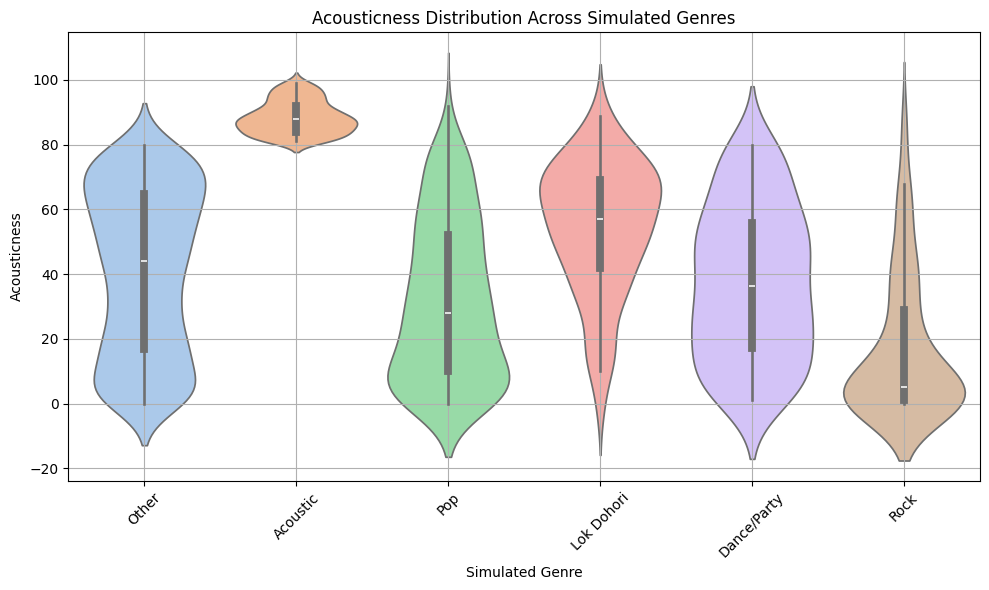

In [5]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Simulated Genre', y='Acoustic', palette='pastel')
plt.title("Acousticness Distribution Across Simulated Genres")
plt.xlabel("Simulated Genre")
plt.ylabel("Acousticness")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Danceability vs Valence with Regression

This jointplot shows the relationship between danceability and valence scores, including a linear regression fit.

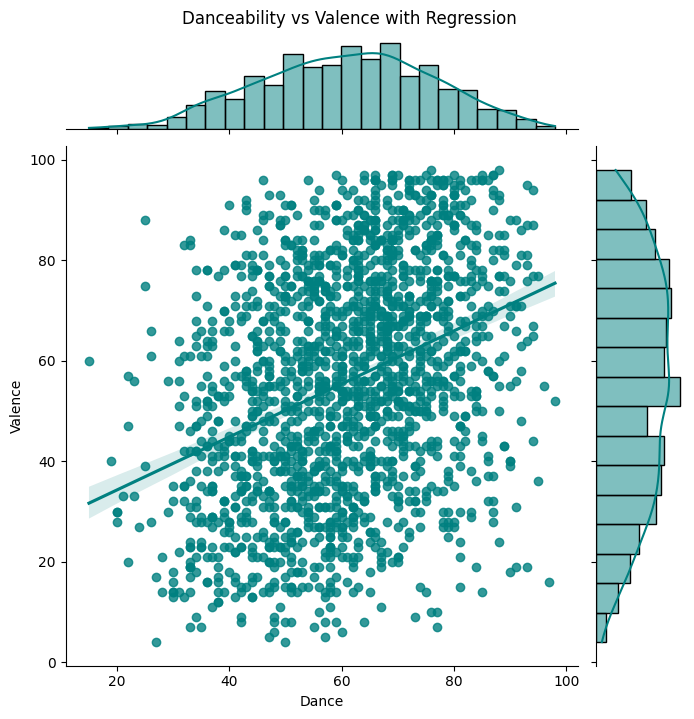

In [6]:
sns.jointplot(data=df, x='Dance', y='Valence', kind='reg', height=7, color='teal')
plt.suptitle("Danceability vs Valence with Regression", y=1.02)
plt.show()

## PairGrid of Audio Features Colored by Simulated Genre

Scatterplot matrix of BPM, Energy, Dance, Valence, and Popularity using genre colors.

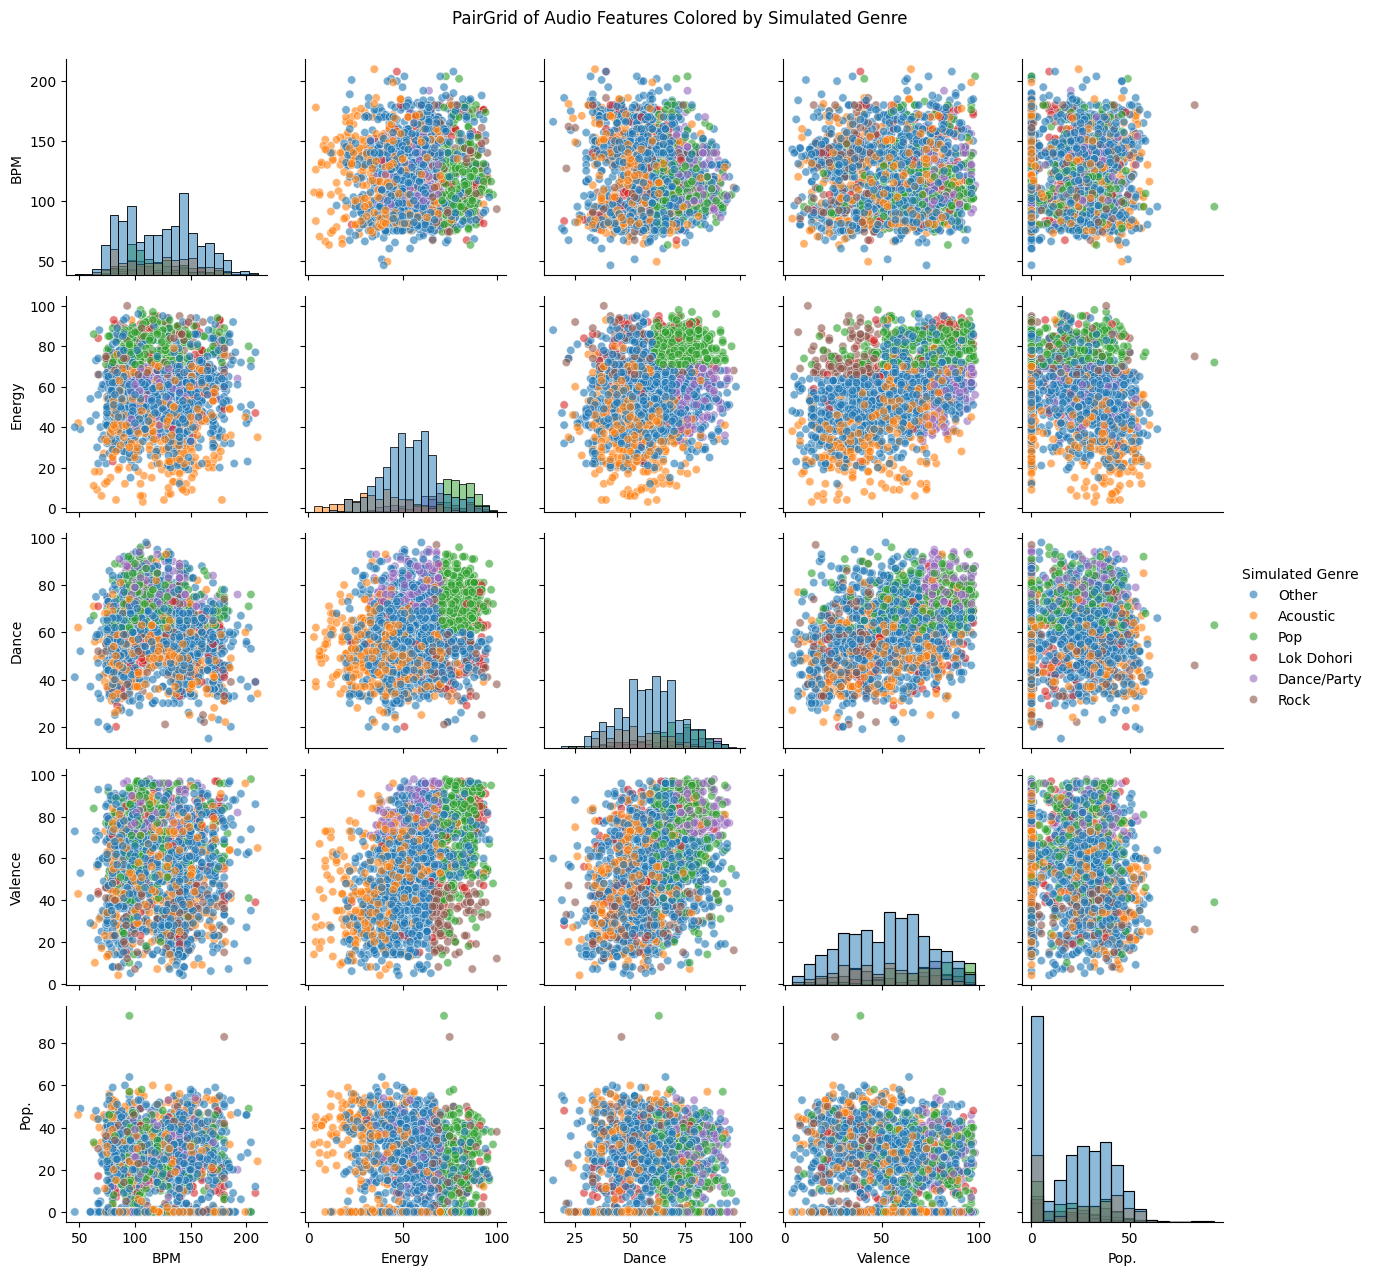

In [7]:
g = sns.PairGrid(df, vars=['BPM', 'Energy', 'Dance', 'Valence', 'Pop.'],
                 hue='Simulated Genre', height=2.5, palette='tab10')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, alpha=0.6)
g.add_legend()
plt.suptitle("PairGrid of Audio Features Colored by Simulated Genre", y=1.02)
plt.show()